#  N-Dimensional Clusters

Now that we have understood K-means for vectors, let's consider the same method for N-dimensional clusters.

The principle is the same as for vectors, but unlike the vector use case, selection of the $distance function$ is very important.  A list of distance functions that the KMeans functionality supports is here:  http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.cdist.html.  You can also define your own distance functions.

We start with $K$ random seeds (centers) and measure the $distance$ to each of the points, after which we move the center into the mean of such distances and reevaluate the distances.

Here is a demo of k-means clustering algorithm:  http://shabal.in/visuals/kmeans/1.html

And here are examples of implementation in Python: https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

With K-means, a lot depends on where clustering starts.  Solutions:

    cross-validation by mini-batching
    choosing multiple random cluster starting points
    kmeans++
    ...    

How kmeans++ works is here:  https://www.youtube.com/watch?v=BIQDlmZDuf8 (**run it at 0.5 the normal speed** - unless you can read $VERY$ fast)

We now proceed to using K-means to split $iris$ data into multi-dimensional clusters

In [9]:
# The standard start of our notebooks
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import re

Load the data set. Clustering belongs to unsupervised learning; so we are not going to need the labels ($iris.target$ is irrelevant; working only with $iris.data$), and we are not breaking the data into training and test sets.

In [10]:
# Load the data, which is included in sklearn.
iris = load_iris()
print ('Iris feature names:', iris.feature_names)
X, Names = iris.data, iris.feature_names

##  Remove the " (cm)" part
pattern = r' \(cm\)'
for nn in np.arange(0,len(Names)):
    Names[nn] = re.sub (pattern, lambda x: "", Names[nn])
print (Names)

print (X.shape)

# Shuffle the data, but make sure that the features and accompanying lalen(bels stay in sync.
np.random.seed(0)  #  To ensure repeatability of results
shuffle = np.random.permutation(np.arange(X.shape[0]))
X = X[shuffle]

Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['sepal length', 'sepal width', 'petal length', 'petal width']
(150, 4)


Let's explore each feature, to see if any grouping exists naturally in each of them.  We'll plot histograms, because boxplots are not sensitive to such groupings.

Back to our data.  If we look at finding the optimal number of clusters as a likelihood-maximization probem, we can use **Information Criteria (*BIC* and *AIC*)** to estimate when we can stop increasing the number: if we are not adding new information by adding one more cluster, we are done.

Now let's look at some 2D combinations of features, just to help us visualize the data:

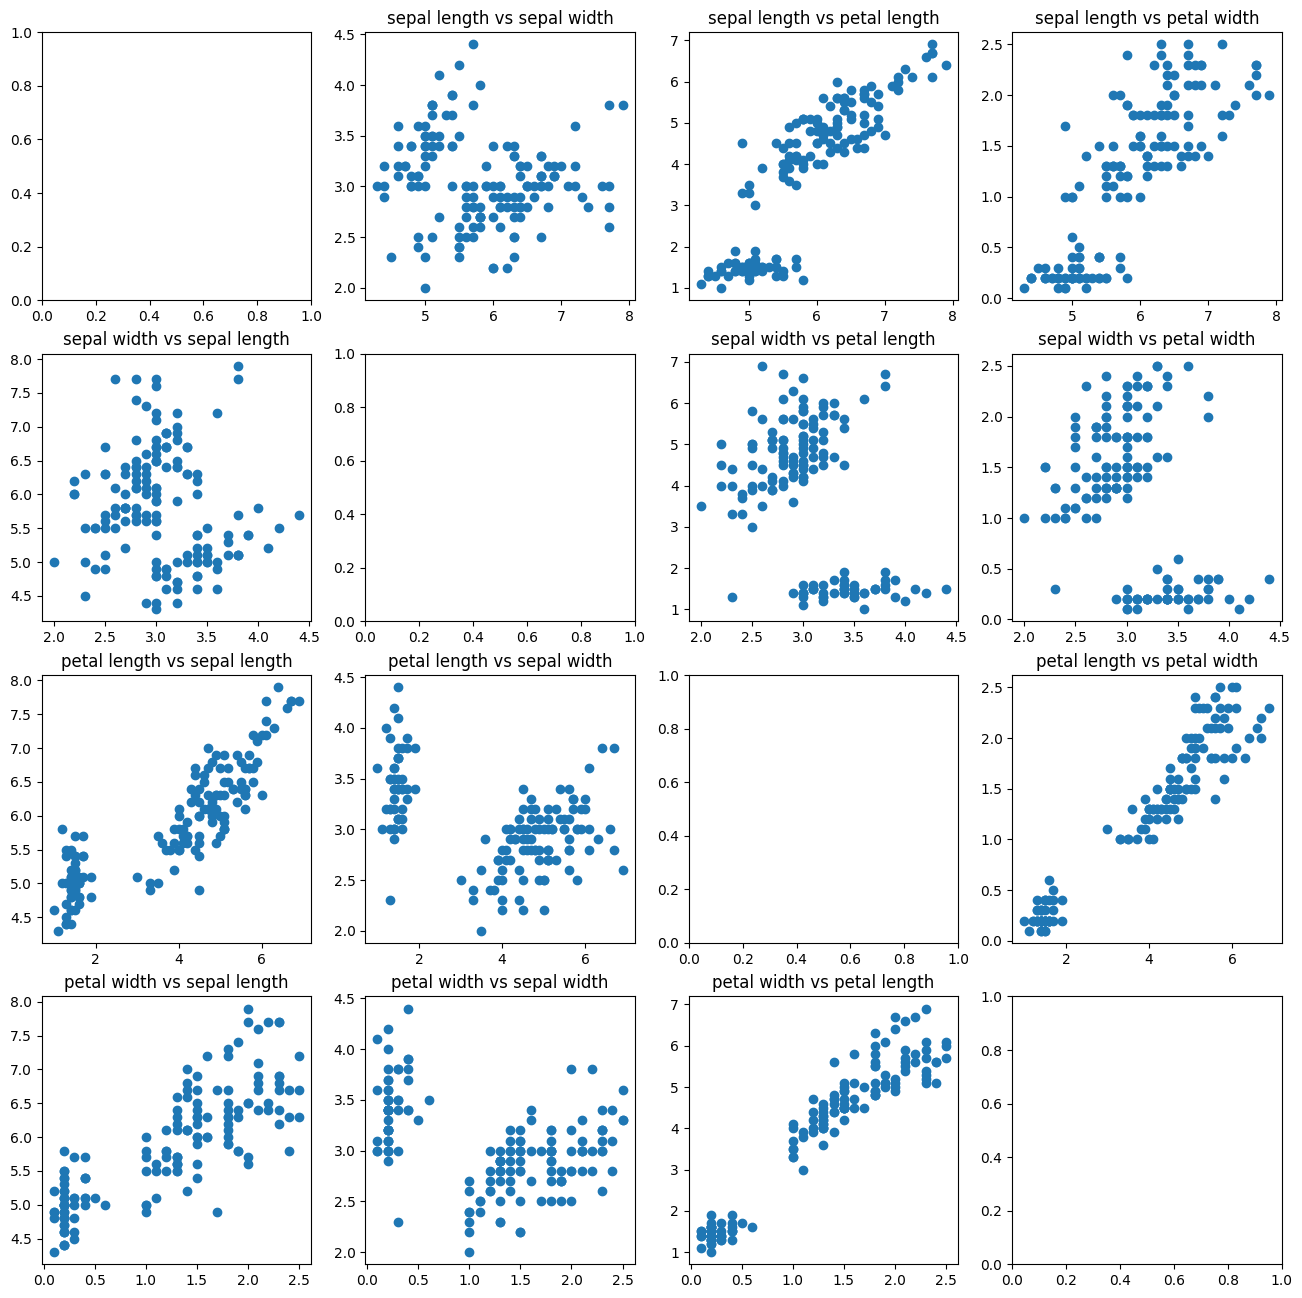

In [11]:
## Bad programming style (spaghetti code), but didn't want to add confusion about looping the features back 
# to the first one
fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))

for f1 in np.arange (X.shape[1]):
    for f2 in np.arange (X.shape[1]):
        if not f1 == f2:
            ax = axes[f1, f2]
            ax.scatter (X[:,f1], X[:,f2])
            ax.set_title (Names[f1] + " vs " + Names[f2])
            
plt.show()

We see that the data naturally fall into 2 clusters for each pair of features.

Let's take one pair (sepal length, sepal width) and see how KMeans works with these two

(1, 2)
[[5.84333333 3.05733333]]
['r']


c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


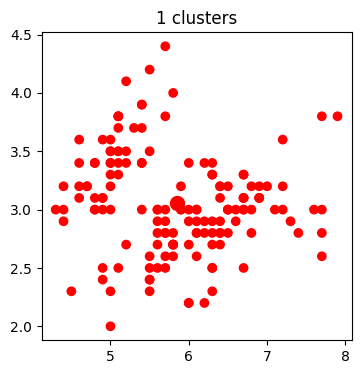

c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(2, 2)
[[6.61044776 2.96567164]
 [5.22409639 3.1313253 ]]
['r' 'g']


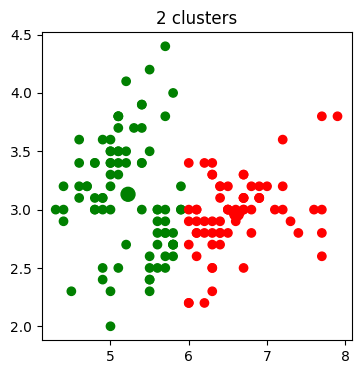

c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(3, 2)
[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]
['r' 'g' 'b']


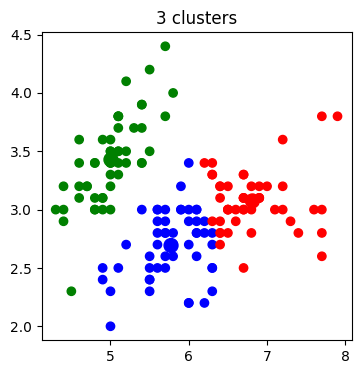

c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(4, 2)
[[5.1875     3.6375    ]
 [6.85348837 3.1       ]
 [5.90980392 2.73529412]
 [4.76666667 2.89166667]]
['r' 'g' 'b' 'm']


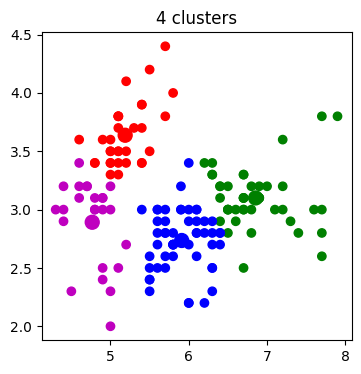

(5, 2)
[[5.22068966 3.66551724]
 [5.85777778 2.71333333]
 [7.475      3.125     ]
 [4.77777778 2.94444444]
 [6.56216216 3.05945946]]
['r' 'g' 'b' 'm' 'c']


c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


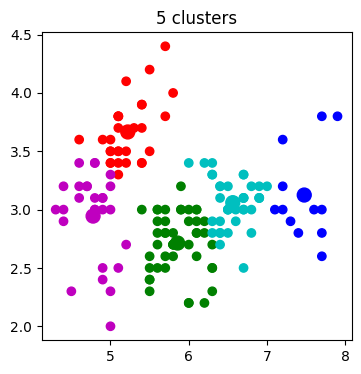

(6, 2)
[[4.75416667 3.1875    ]
 [5.78378378 2.6972973 ]
 [7.31176471 3.12941176]
 [6.445      2.995     ]
 [5.268      3.704     ]
 [4.94285714 2.38571429]]
['r' 'g' 'b' 'm' 'c' 'k']


c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


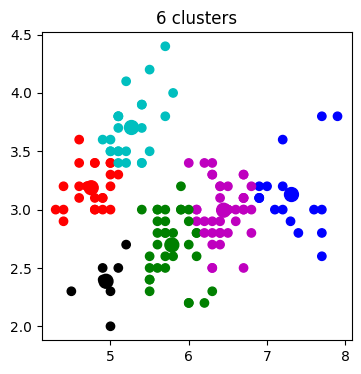

c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(7, 2)
[[6.6        3.13793103]
 [5.67407407 2.74444444]
 [4.828125   3.265625  ]
 [6.22307692 2.7       ]
 [5.37058824 3.8       ]
 [7.475      3.125     ]
 [4.94285714 2.38571429]]
['r' 'g' 'b' 'm' 'c' 'k' '0']


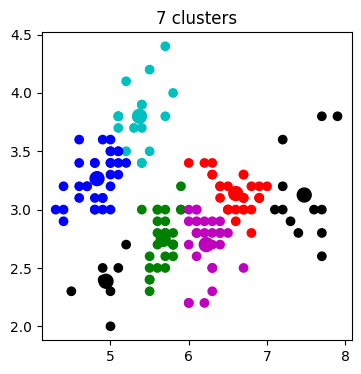

In [12]:
Xpair = X[:,(0,1)]

def Get2DClusters (Xpair, N):
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (Xpair)
    print (clstrs.cluster_centers_.shape)
    print (clstrs.cluster_centers_)

    myColors = ('red', 'green', 'blue', 'magenta', 'cyan', 'k', '0.2', '0.4')
    if N > 8:
        return clstrs
    
    myClCols = np.empty(Xpair.shape[0],dtype = str)
    for ii in np.arange (0, len(clstrs.labels_)):
        color_index = clstrs.labels_[ii]
        myClCols[ii] = myColors[color_index]

    plt.figure(figsize = (4, 4))
    plt.scatter (Xpair[:,0], Xpair[:,1], c = myClCols)

    myCntrCol = np.empty(N,dtype = str)
    for ii in np.arange (0, N):
        color_index = ii
        myCntrCol[ii] = myColors[color_index]

    print (myCntrCol)
    plt.scatter (clstrs.cluster_centers_[:,0], clstrs.cluster_centers_[:,1], c = myCntrCol, s = 100)
    plt.title (str(N) + " clusters")
    plt.show()
    return clstrs

for nn in range (1, 8):
    myClstrs = Get2DClusters(Xpair, N = nn)


Now you have 8 data points that need to be generate into two clusters. (-7, -5), (8, 6), (-4, -4), (5, 3) (-6, -4), (6, 5), (-5, -6), (7, 7) Please use the non-builtin function to do it and follow the steps restrictly.
1. Generate the image of all the data points
2. Arbitrarily choose two centroids and generate it on the image.
3. Assign each data points by using the Euclidean Distance function. (Add comments of how you decide which group the data should go into)
4. Generate new image of all the data points and the two centroids, distinguish the group by using different color.
5. Realign the centroids to center of the groups and generate it on the image.
6. Repeat 3.4.5. until converge.



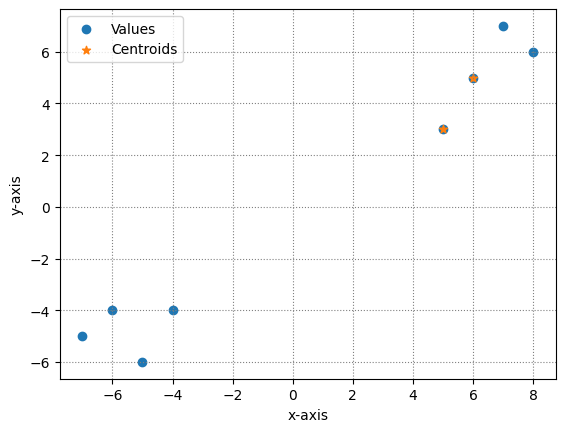

Centroids are 
[[6. 5.]
 [5. 3.]]


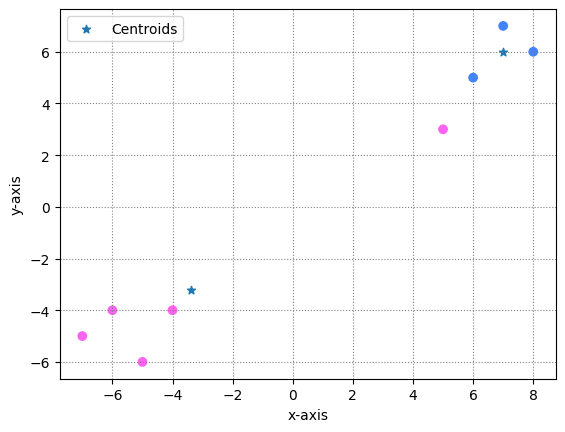

Centroids are 
[[ 7.   6. ]
 [-3.4 -3.2]]


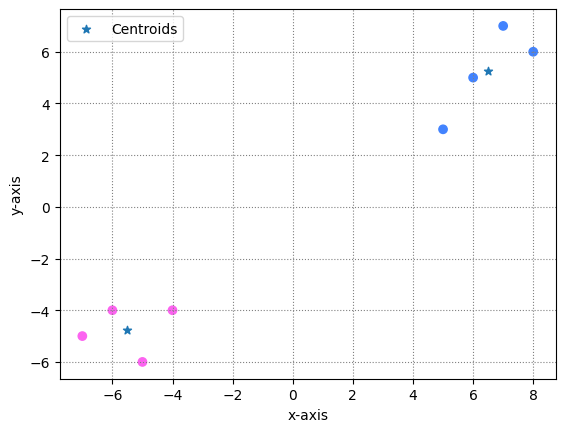

Centroids are 
[[ 6.5   5.25]
 [-5.5  -4.75]]


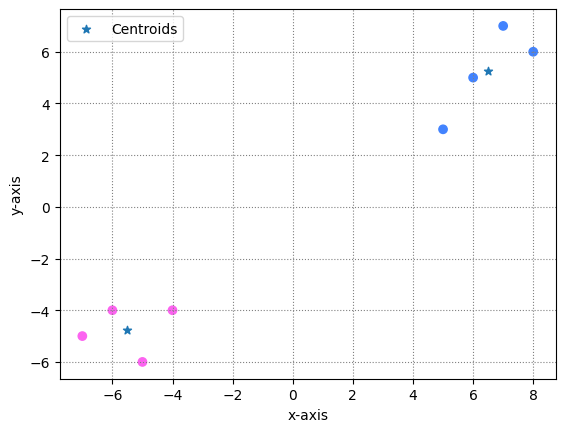

In [13]:
import random
np.random.seed(1)
random.seed(1)

values = np.array([[-7, -5], [8, 6], [-4, -4], [5, 3], [-6, -4], [6, 5], [-5, -6], [7, 7]])
n = 2

# get random color for n clusters
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
            for i in range(n)]

# get arbitrary centroids to start K-Means
new_centroids = np.zeros((n, values.shape[1]))
index = np.random.choice(values.shape[0], n)

for i in range(n):
    new_centroids[i] += values[index[i]]

# plot values and arbitrary centroids
x, y = values.T
x1, y1 = new_centroids.T

fig, ax = plt.subplots()
ax.scatter(x,y, label = "Values")
ax.scatter(x1, y1, label = "Centroids", marker = "*")
ax.legend()
ax.grid(color = "gray", linestyle = ":")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
plt.show()

# create variable to store re-aligned the centroids
centroids = np.empty((n, values.shape[1]))

# repeat the loop until converge
while (centroids == new_centroids).all() == False:
    print(f"Centroids are \n{new_centroids}")
    centroids = new_centroids

    # calculate distances for between values and centroids 
    distance = np.zeros((values.shape[0], n))
    for v in range(values.shape[0]):
        for c in range(len(centroids)):
            d = (sum((values[v] - centroids[c])**2))**0.5
            distance[v, c] = d

    cluster_color = []
    cluster_counter = np.zeros((n))
    new_centroids = np.zeros((n, values.shape[1]))

    # assign values to each cluster
    for i in range(values.shape[0]):
        cluster_index = np.argmin(distance[i])
        cluster_color.append(color[cluster_index])
        cluster_counter[cluster_index] += 1
        new_centroids[cluster_index] += values[i]

    # calculate new centroids
    new_centroids = new_centroids / cluster_counter[:, None]

    # plot each cluster and new centroids
    x1, y1 = new_centroids.T

    fig, ax = plt.subplots()
    ax.scatter(x, y, c = cluster_color)
    ax.scatter(x1, y1, label = "Centroids", marker = "*")
    ax.legend()
    ax.grid(color = "gray", linestyle = ":")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    plt.show()




Use built-in k-means function to generate the centroids and verify your output from previous step.

In [14]:
# fit data into built in K means function
km = KMeans(n_clusters=2, init='k-means++')

km.fit(values)

cluster_centers = km.cluster_centers_
print(cluster_centers)

[[ 6.5   5.25]
 [-5.5  -4.75]]


c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
#!jupyter nbconvert --to html Final-K_means_clustering-N_dimensions.ipynb

[NbConvertApp] Converting notebook Final-K_means_clustering-N_dimensions.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 939572 bytes to Final-K_means_clustering-N_dimensions.html
